Subplot function

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
df = pd.read_csv('data_jobs.csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_exploded = df.explode('job_skills')
skill_count = df_exploded.groupby(['job_title_short','job_skills']).size()
df_skill_count = skill_count.reset_index(name='skill_count')
df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)

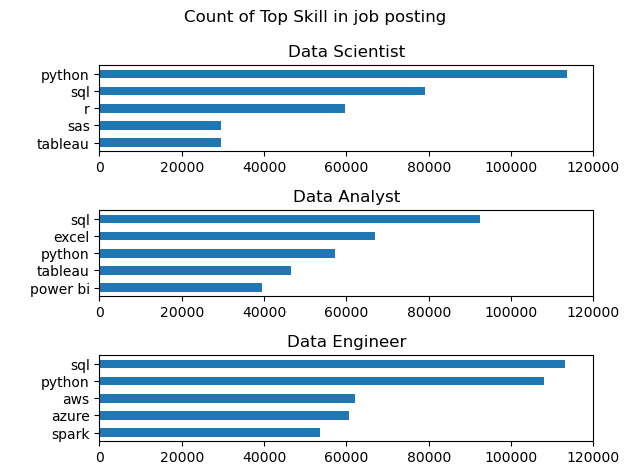

In [3]:
job_title = ['Data Scientist', 'Data Analyst', 'Data Engineer']
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate (job_title):
     df_plot = df_skill_count[df_skill_count['job_title_short']==job_title].head(5)
     df_plot.plot(kind='barh',x='job_skills', y='skill_count', ax=ax[i], title=job_title)
     ax[i].invert_yaxis()
     ax[i].legend().set_visible(False)
     ax[i].set_ylabel(' ')
     ax[i].set_xlim(0,120000)

fig.suptitle('Count of Top Skill in job posting')
fig.tight_layout()